In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/space_missions1.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


In [4]:
df = pd.read_csv('/kaggle/input/space_missions1.csv')

In [5]:
df.head()

,Company,Location,Year,Time,Rocket,MissionStatus,RocketStatus,Price,Mission
0,AEB,"VLS Pad, Alcântara Launch Center, Maranhão, Br...",1997,NaN,VLS-1,0,Retired,NaN,SCD-2A
1,AEB,"VLS Pad, Alcântara Launch Center, Maranhão, Br...",1999,1899-12-30 19:40:00,VLS-1,0,Retired,NaN,SACI-2
2,AEB,"VLS Pad, Alcântara Launch Center, Maranhão, Br...",2003,NaN,VLS-1,0,Retired,NaN,"SATEC, UNOSAT"
3,AMBA,"LA-5B, RAAF Woomera Range Complex, Australia",1967,NaN,Redstone Sparta,1,Retired,NaN,WRESAT
4,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958,1899-12-30 03:48:00,Juno I,1,Retired,NaN,Explorer 1


In [6]:
df.tail()

,Company,Location,Year,Time,Rocket,MissionStatus,RocketStatus,Price,Mission
4621,VKS RF,"Site 90/20, Baikonur Cosmodrome, Kazakhstan",2001,1899-12-30 04:00:00,Tsyklon-2,1,Retired,NaN,Cosmos 2383
4622,VKS RF,"Site 90/20, Baikonur Cosmodrome, Kazakhstan",2004,1899-12-30 06:00:00,Tsyklon-2,1,Retired,NaN,Cosmos 2405
4623,VKS RF,"Site 90/20, Baikonur Cosmodrome, Kazakhstan",2006,1899-12-30 04:00:00,Tsyklon-2,1,Retired,NaN,Cosmos 2421
4624,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia",1991,1899-12-30 03:54:00,Tsyklon-3,1,Retired,NaN,Intercosmos 25 & Magion 3
4625,Yuzhmash,"Site 90/20, Baikonur Cosmodrome, Kazakhstan",1969,1899-12-30 10:59:00,Tsyklon-2,1,Retired,NaN,IS Mass Model


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4626 entries, 0 to 4625
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        4626 non-null   object 
 1   Location       4626 non-null   object 
 2   Year           4626 non-null   int64  
 3   Time           4501 non-null   object 
 4   Rocket         4626 non-null   object 
 5   MissionStatus  4626 non-null   int64  
 6   RocketStatus   4626 non-null   object 
 7   Price          1264 non-null   float64
 8   Mission        4626 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 325.4+ KB


**Let's get a quick summary of all the numeric columns in the dataset:**

In [8]:
graphs = df.describe()
graphs

,Year,MissionStatus,Price
count,4626.000000,4626.000000,1264.000000
mean,1989.611760,0.899265,128.407437
std,19.373522,0.301010,256.848149
min,1957.000000,0.000000,2.000000
25%,1973.000000,1.000000,30.000000
50%,1987.000000,1.000000,63.000000
75%,2007.000000,1.000000,116.250000
max,2022.000000,1.000000,5000.000000


**There can be a lot of Null or NaN values in the Dataset. Let's take a looks at how many null values are in the dataset.**


In [9]:
df.isnull().sum()

Company             0
Location            0
Year                0
Time              125
Rocket              0
MissionStatus       0
RocketStatus        0
Price            3362
Mission             0
dtype: int64

The price col has many NaN values.

In [10]:
# Data types and unique value counts
print(df.dtypes)
print()
print(df.nunique())


Company           object
Location          object
Year               int64
Time              object
Rocket            object
MissionStatus      int64
RocketStatus      object
Price            float64
Mission           object
dtype: object

Company            62
Location          158
Year               66
Time             1300
Rocket            370
MissionStatus       2
RocketStatus        2
Price              59
Mission          4555
dtype: int64


In [11]:
# Group by Company and aggregate missions
company_summary = df.groupby('Company').agg({'Mission': 'count', 'Price': 'mean'})
company_summary


,Mission,Price
Company,,
AEB,3,NaN
AMBA,8,NaN
ASI,9,NaN
Arianespace,293,140.875969
Armée de l'Air,4,NaN
...,...,...
VKS RF,215,36.615385
Virgin Galactic,3,NaN
Virgin Orbit,5,12.000000


# Exploratory Data Analysis (EDA)


## 1. Summary statistics 
Calculating mean, median, mode, and standard deviation for the 'Price' column


In [12]:
mean_price = df['Price'].mean()
median_price = df['Price'].median()
mode_price = df['Price'].mode()[0]  # The first mode (most common value)
std_price = df['Price'].std()

# Calculate range (max - min)
range_price = df['Price'].max() - df['Price'].min()

print(f"Summary Statistics for Price: \n\nMean: {mean_price}, \nMedian: {median_price}, \nMode: {mode_price}, \nStandard Deviation: {std_price}, \nRange: {range_price}")


Summary Statistics for Price: 

Mean: 128.40743670886076, 
Median: 63.0, 
Mode: 450.0, 
Standard Deviation: 256.8481489734983, 
Range: 4998.0


In [13]:
# Frequency distribution for RocketStatus 
rocket_status_distribution = df['RocketStatus'].value_counts()
print('Frequency Distribution:\n')
print("Rocket Status Distribution:\n", rocket_status_distribution)
print()

# Frequency distribution for MissionStatus
mission_status_distribution = df['MissionStatus'].value_counts()
print("Mission Status Distribution:\n", mission_status_distribution)


Frequency Distribution:

Rocket Status Distribution:
 RocketStatus
Retired    3618
Active     1008
Name: count, dtype: int64

Mission Status Distribution:
 MissionStatus
1    4160
0     466
Name: count, dtype: int64


## 2. Visualizations:

In [14]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

missions_per_year = df['Year'].dt.year.value_counts().sort_index()

fig = px.line(x=missions_per_year.index, y=missions_per_year.values, title='Global Space Mission Trends Over Time')
fig.update_layout(xaxis_title='Year', yaxis_title='Number of Space Missions By Year', showlegend=False)
fig.show()

In [15]:
fig = px.histogram(
    df,
    x="Price",
    title="Distribution of Rocket Prices",
    nbins=10,
    labels={"Price": "Rocket Price (Millions USD)"},
    
)
fig.show()


As there are a lot of missing/null values so most of data is plotted at 0.

In [16]:
df_grouped = df.groupby(['Company', 'MissionStatus']).size().reset_index(name='Count')

fig = px.bar(
    df_grouped,
    x="Company",
    y="Count",
    color="MissionStatus",
    title="Mission Success Rate by Company",
    labels={"MissionStatus": "Mission Status", "Company": "Company"},
    barmode="group",
    color_discrete_sequence=px.colors.sequential.Viridis  
)

fig.update_layout(
    xaxis={'categoryorder': 'total descending'}, 
    yaxis_title="Count",
    xaxis_title="Company",
    font=dict(size=12)
)
fig.update_layout(
    xaxis=dict(
        tickangle=45,  
        automargin=True,  
    ),
    width=1200,  
    height=600,  
    margin=dict(
        l=40,r=40,t=40,b=100
    ),
    title_font_size=16,
    xaxis_title="Company",
    yaxis_title="Count"
)

fig.show()


In [17]:
company_counts = df['Company'].value_counts().reset_index()
company_counts.columns = ['Company', 'Count']

# Select top 10 companies by count
top_10_companies = company_counts.head(10)

fig = px.bar(
    top_10_companies,
    x='Company',
    y='Count',
    title='Top 10 Companies by Mission Count',
    labels={'Company': 'Company', 'Count': 'Count'}
)

fig.update_layout(
    xaxis=dict(
        tickangle=20,  
        automargin=True
    ),
    width=800,  
    height=500,  
    margin=dict(l=40, r=40, t=40, b=100),
    xaxis_title="Company",
    yaxis_title="Count",
    title_font_size=16
)

fig.show()

In [18]:
# Extract country from the 'Location' column
df['Country'] = df['Location'].str.split(',').str[2].str.strip()

# Group by country and rocket status
df_grouped = df.groupby(['Country', 'RocketStatus']).size().reset_index(name='Count')

# Create the bar plot
fig = px.bar(
    df_grouped,
    x="Country",
    y="Count",
    color="RocketStatus",
    title="Number of Missions by Country",
    labels={"Count": "Count", "RocketStatus": "Rocket Status"},
    barmode="group",
    color_discrete_sequence=px.colors.qualitative.Set1  
)

fig.update_layout(
    xaxis={'categoryorder': 'total descending'},  
    yaxis_title="Count",
    xaxis_title="Country",
    font=dict(size=12)
)

fig.show()


In [19]:
fig = px.box(
    df,
    x="RocketStatus",
    y="Price",
    title="Price Distribution by Rocket Status",
    labels={"RocketStatus": "Rocket Status", "Price": "Price (Millions USD)"},
    template="ggplot2",
    color="RocketStatus",

)
fig.show()


In [20]:
# Convert Year column to datetime format
df["Year"] = pd.to_datetime(df["Year"], format="%Y", errors="coerce")

# Drop rows where Year is invalid (if any)
df = df.dropna(subset=["Year"])

# Extract the year as a separate numeric column for analysis
df["YearNumeric"] = df["Year"].dt.year

# Sort data by the numeric Year column
df = df.sort_values("YearNumeric")

# Group data by YearNumeric and MissionStatus, taking the average Rocket Price
df_aggregated = (
    df.groupby(["YearNumeric", "MissionStatus"])["Price"]
    .mean()
    .reset_index()
)

# Dynamically select tick values to reduce clutter
unique_years = sorted(df_aggregated["YearNumeric"].unique())  # Get sorted unique years
tickvals = unique_years[::max(1, len(unique_years) // 10)]  # Show approximately 10 ticks

# Plot the data
fig = px.line(
    df_aggregated,
    x="YearNumeric",
    y="Price",
    color="MissionStatus",
    title="Mission Trends and Rocket Prices Over Years",
    labels={"YearNumeric": "Year", "Price": "Rocket Price (Millions USD)", "MissionStatus": "Mission Status"},
    markers=True,
)

# Customize x-axis to reduce clutter
fig.update_layout(
    xaxis=dict(
        tickmode="array",  # Use specific tick values
        tickvals=tickvals,  # Dynamically chosen ticks
        tickangle=45,  # Tilt the ticks for better readability
    ),
    width=900,
    height=600,
)

fig.show()


In [21]:
df.head()

,Company,Location,Year,Time,Rocket,MissionStatus,RocketStatus,Price,Mission,Country,YearNumeric
4386,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-01-01,1899-12-30 16:44:00,Vanguard,0,Retired,NaN,Vanguard TV3,Florida,1957
2085,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-01-01,1899-12-30 19:28:00,Sputnik 8K71PS,1,Retired,NaN,Sputnik-1,Kazakhstan,1957
2084,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-01-01,1899-12-30 02:30:00,Sputnik 8K71PS,1,Retired,NaN,Sputnik-2,Kazakhstan,1957
2086,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-01-01,1899-12-30 07:12:00,Sputnik 8A91,1,Retired,NaN,Sputnik-3 #2,Kazakhstan,1958
4387,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-01-01,1899-12-30 02:53:00,Vanguard,0,Retired,NaN,Vanguard TV5,Florida,1958


## 3. Correlation analysis

- Correlation is a statistical measure of the relationship between two variables.
- It measures how two variables tend to vary, be associated, or occur together in a way that's not expected by chance.
- We will measure correlations between numerical variables (Year, MissionStatus, Price) of our dataset.


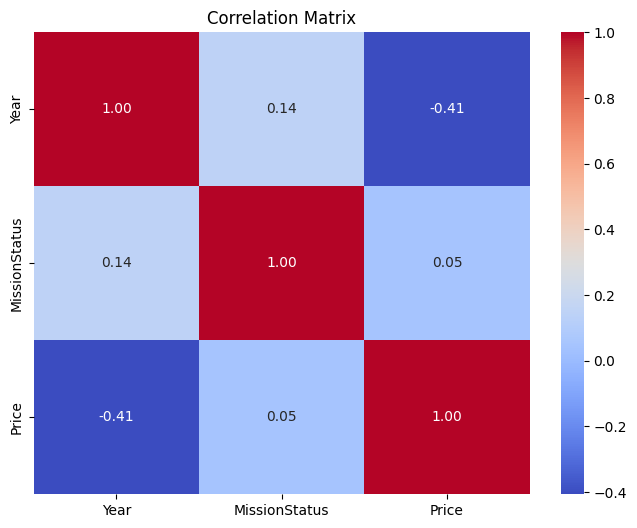

In [22]:
correlation_matrix = df[['Year', 'MissionStatus', 'Price']].corr()

# Heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


- **Year and MissionStatus (0.14):** This represents a weak positive correlation. It suggests that as the year increases, there is a slight improvement in mission status. The relationship is not strong and could be influenced by other factors.
- **MissionStatus and Price (0.05)**: This is a very weak positive correlation, close to zero. It indicates almost no linear relationship between mission status and price. A higher mission status does not appear to be strongly associated with changes in price.
- **Year and Price (-0.41)**: This shows a moderate negative correlation. It suggests that as the years progress, the prices tend to decrease. This could imply advancements in technology, better cost management, or other industry trends leading to lower costs over time.
- The diagonal always shows **1.0** since each variable is perfectly correlated with itself.


## 4. Missing Value Analysis

In [23]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

missing_data = {'Columns': ['Company', 'Location', 'Year', 'Time', 'Rocket', 'MissionStatus', 'RocketStatus', 'Price', 'Mission'],
                'Missing Count': [0, 0, 0, 125, 0, 0, 0, 3362, 0]}
missing_df = pd.DataFrame(missing_data)

# Bar plot with plotly
fig = px.bar(missing_df, x='Columns', y='Missing Count', title='Missing Values Per Column',
             text='Missing Count', color='Missing Count', color_continuous_scale='viridis')
fig.update_traces(textposition='outside')
fig.update_layout(xaxis_title='Columns', yaxis_title='Missing Count', coloraxis_showscale=False)
fig.show()


Missing Values:
 Company             0
Location            0
Year                0
Time              125
Rocket              0
MissionStatus       0
RocketStatus        0
Price            3362
Mission             0
Country            26
YearNumeric         0
dtype: int64


## 5. Outlier detection
- Outlier detection is the process of *identifying data points that are significantly different from the rest of a dataset*.
- Outliers can be unusually high or low compared to the majority of the data.
- We will Analyze potential outliers in numerical columns, especially "**Price**".

In [24]:
# Create a boxplot for the 'Price' column to detect outliers
fig = px.box(df, y="Price", title="Outlier Detection for Price", 
             labels={"Price": "Price"}, color_discrete_sequence=['#FF6347'])

# Show the plot
fig.show()


## 6. Feature distribution analysis
Here we will examine how individual features (variables) within our **SpaceMission** dataset are spread out or distributed, including their frequency, range, and shape of the distribution. This will help us identify patterns, outliers, and potential issues within the data, which we will use in machine learning later to inform preprocessing and feature engineering steps before model building. 

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4626 entries, 4386 to 3914
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Company        4626 non-null   object        
 1   Location       4626 non-null   object        
 2   Year           4626 non-null   datetime64[ns]
 3   Time           4501 non-null   object        
 4   Rocket         4626 non-null   object        
 5   MissionStatus  4626 non-null   int64         
 6   RocketStatus   4626 non-null   object        
 7   Price          1264 non-null   float64       
 8   Mission        4626 non-null   object        
 9   Country        4600 non-null   object        
 10  YearNumeric    4626 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(7)
memory usage: 415.6+ KB


### I. Year
It is a numeriacal column so we will be using **line chart** to show trends of counts over years.

In [ ]:
# Count occurrences of each year
year_counts = df['Year'].value_counts().reset_index()
year_counts.columns = ['Year', 'Count']  
year_counts = year_counts.sort_values('Year')  #Sort by Year

#a line chart using Plotly
fig = px.line(year_counts, 
              x='Year', y='Count', 
              title='Number of Records Over Years', 
              markers=True)

fig.update_layout(xaxis_title='Year', yaxis_title='Count')
fig.show()


### II. Price:
It is also a *Numerical Column* so usign a **box plot** to visualize the distribution and outliers in prices.

In [ ]:
fig = px.box(df, y='Price', 
             title='Distribution of Prices', 
             points="all", 
             color_discrete_sequence=['green'])
fig.update_layout(yaxis_title='Price')
fig.show()


### III. MissionStatus:
A Categorical Column. Using a **pie chart** to visualize the proportions of different mission statuses.

In [ ]:
# Count occurrences of MissionStatus
mission_status_counts = df['MissionStatus'].value_counts().reset_index()
mission_status_counts.columns = ['MissionStatus', 'Count']  

fig = px.pie(mission_status_counts, 
             values='Count', names='MissionStatus', 
             title='Proportion of Mission Statuses', 
             color_discrete_sequence=px.colors.qualitative.Set3)

fig.show()


### IV. Company:
A Categorical Column. Use a **bar chart** to display the top companies based on frequency.

In [ ]:
# Get the top 10 companies by frequency
top_companies = df['Company'].value_counts().head(10).reset_index()
top_companies.columns = ['Company', 'Count']  # Rename columns for clarity

# Create a bar chart
fig = px.bar(top_companies, 
             x='Company', 
             y='Count', 
             title='Top 10 Companies by Count', 
             text='Count',
             color='Count', 
             color_continuous_scale='viridis')

fig.update_layout(
    xaxis_title='Company', 
    yaxis_title='Count', 
    xaxis={'categoryorder': 'total descending'}
)

fig.show()


### V. Location
A Categorical Column. Analyzing the **frequency of top launch locations.**

In [ ]:

fig = px.scatter_geo(df, locations='Location', locationmode='country names',
                     title='Space Mission Launch Locations')
fig.show()

location_success_rate = df.groupby('Location')['MissionStatus'].apply(lambda x: (x == 'Success').mean())

fig2 = px.choropleth(locations=location_success_rate.index, locationmode='country names',
                      color=location_success_rate.values, title='Mission Success Rate by Launch Location',
                      labels={'color': 'Success Rate'})
fig2.show()

In [ ]:
# Get the top 10 locations
top_locations = df['Location'].value_counts().head(10).reset_index()
top_locations.columns = ['Location', 'Count']  

# Create a horizontal bar chart
fig = px.bar(top_locations, y='Location', x='Count', 
             orientation='h', 
             title='Top 10 Launch Locations', 
             text='Count', 
             color='Count', 
             color_continuous_scale='plasma')
fig.update_layout(yaxis_title='Location', xaxis_title='Count')
fig.show()



### VI. RocketStatus:
- Categorical Column
- Visualizing RocketStatus against Year.

In [ ]:
# Group data by Year and RocketStatus
rocket_status_year = df.groupby(['Year', 'RocketStatus']).size().reset_index(name='Count')

# Create a stacked bar chart
fig = px.bar(rocket_status_year, x='Year', y='Count', color='RocketStatus', 
             title='RocketStatus Distribution Over Years', 
             barmode='stack')
fig.update_layout(xaxis_title='Year', yaxis_title='Count')
fig.show()


### VII. Mission: 
- Categorical Column
- Using a word cloud to visualize frequent mission names.

In [ ]:
from wordcloud import WordCloud
# Combine all mission names into one string
mission_words = ' '.join(df['Mission'].dropna().astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(mission_words)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Mission Names')
plt.show()


### VIII. Rocket types:
counts of the most commonly used rockets.

In [ ]:
top_rockets = df['Rocket'].value_counts().head(10).reset_index()
top_rockets.columns = ['Rocket', 'Count']  # Rename columns for clarity

fig = px.bar(
    top_rockets, 
    x='Count', 
    y='Rocket', 
    orientation='h', 
    title='Top 10 Rockets by Count', 
    text='Count', 
    color='Count', 
    color_continuous_scale='Blues'
)
fig.update_layout(xaxis_title='Count', yaxis_title='Rocket')
fig.show()


# Data Preprocessing

## 1. Handling missing values:
we have seen that our columns **Price** and **Time** has missing values, so we will be filling those missing values with median in case of price and drop the rows where Time colum in NaN.

In [ ]:
df.isnull().sum()


In [ ]:

# Fill missing values in 'Price' with the median
df['Price'] = df['Price'].fillna(df['Price'].median())

# Drop rows with missing values in 'Time'
df = df.dropna(subset=['Time'])


In [ ]:
df.isnull().sum()


In [ ]:
df.info()

In [ ]:
df = df.drop(columns=['Year'])

In [ ]:
df['Country']

In [ ]:
df = df.drop(columns=['Country'])

In [ ]:
df.country

In [ ]:
df.info()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# One-Hot Encoding for categorical columns
categorical_cols = ['Company', 'Location', 'Rocket', 'RocketStatus', 'Mission']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Handle missing values (drop or impute)
df_encoded.fillna(df_encoded.mean(), inplace=True)

# Define Features and Target
X = df_encoded.drop(columns=['MissionStatus'])  # Features
y = df_encoded['MissionStatus']                 # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 2. Encoding categorical variables:
It means we will convert categorical columns (Company, Location, Rocket, etc.) into numerical formats using:

- **Label Encoding:** For ordinal data.
- **One-Hot Encoding:** For nominal data.

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# One-Hot Encoding for categorical columns
categorical_cols = ['Company', 'Location', 'Rocket', 'RocketStatus', 'Mission']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Handle missing values (drop or impute)
df_encoded.fillna(df_encoded.mean(), inplace=True)

# Define Features and Target
X = df_encoded.drop(columns=['MissionStatus'])  # Features
y = df_encoded['MissionStatus']                 # Target


## 3. Scaling or normalizing numerical features:
In our dataset, there is no need for scaling or normalizing the numerical features(Price, Year), so we will skip this part.

## 4. Splitting the dataset into training and testing sets:
Splitting the dataset into training and testing sets is a critical step in machine learning because:

- **Training Set:** Used to train the model (fit the algorithm to the data).
- **Testing Set:** Used to evaluate the model’s performance on unseen data, ensuring it generalizes well.

In [ ]:

# Define Features and Target
X = df_encoded.drop(columns=['MissionStatus'])  # Features
y = df_encoded['MissionStatus']                 # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Machine Learning Model
### Target Variable: MissionStatus
- **Values**: 0 and 1 (representing failure and success)
- This makes it a **binary classification** problem.

### Features:
Includes categorical columns **(Company, Location, Rocket, RocketStatus, Mission)** and numerical columns **(Year, Price)**.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# Initialize RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
